<a href="https://colab.research.google.com/github/daquarti/AI/blob/main/Distil_Bert_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.menos de 48hs de evolución
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/My Drive/Emergencias/Consultas/"

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv (path + 'input_distil_v1')
df.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99329 entries, 0 to 99328
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resumen      99329 non-null  object
 1   diagnostico  99329 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
df.head(20)

,resumen,diagnostico
0,"<DNIPACIENTE> 42998688 <SEXOPACIENTE> M <EDADPACIENTE> 2000-12-02 <MOTIVODECONSULTA> Dolor de garganta. <EPICRISIS> REFIERE DOLOR DE GARGANTA DE 72 HORAS DE EVOLUCION, NIEGA FIEBRE, NIEGA ANOSMIA, NIEGA AGEUSIA,",RES Faringitis aguda
1,<DNIPACIENTE> 25231397 <SEXOPACIENTE> F <EDADPACIENTE> 1976-4-2 <MOTIVODECONSULTA> Receta antigripal <EPICRISIS> Se realiza prescripción de vacuna antigripal,OTRO Medicacion prescripcion renovacion inyeccion (355)
2,"<DNIPACIENTE> 22269524 <SEXOPACIENTE> F <EDADPACIENTE> 1971-07-14 <MOTIVODECONSULTA> Presion <EPICRISIS> Paciente Femenino de 48 años de edad consulta por , Presion.. MEJORIA CLINICA\nSE INDICA 5 MG DE LOTRIAL",CARV Otros signos sintomas cardiovasculares (466)
3,"<DNIPACIENTE> 35639756 <SEXOPACIENTE> F <EDADPACIENTE> 1990-12-18 <MOTIVODECONSULTA> Vómitos. Diarrea. Dolor de abdomen. Nauseas. Congestión Nasal. <EPICRISIS> femenino de 29 años con diarrea y vomitos,cefalea,congestion nasal,afebril,se inidca reposo por 72 hs,dieta y tto",DIGES Dolor abdominal generalizado retortijones (319)
4,"<DNIPACIENTE> 8704664 <SEXOPACIENTE> M <EDADPACIENTE> 1947-04-26 <MOTIVODECONSULTA> Sospecha de covid. <EPICRISIS> Paciente consulta por FATIGA, TOS SECA, DOLOR DE PECHO. \nANTECEDENTES DE HIPERTENSION Y OBESIDAD.\nFAMILIARES SOLICITAN HISOPADO EN DOMICILIO CON URGENCIA.",INESP Confirmado COVID19 x epidemiol
5,"<DNIPACIENTE> 4246046 <SEXOPACIENTE> F <EDADPACIENTE> 1941-10-15 <MOTIVODECONSULTA> Sospecha de covid. <EPICRISIS> CONSULTA EL HIJO DE LA PACIENTE; DE 78 AÑOS TIENE EPOC MEDICADA CON EL NEUMOTEROL MAS ASPIRE; CON DX DE COVID-19 POR CONTACTO ESTRECHO. PRESENTO DISNEA LEVE; LE DIERON DE ALTA HACE 20 DIAS, SATURA 96% TIENE LABORATORIOS CON HB: 13, LEUCITOS: 4.800 PLAQUETAS 260.000. GLUCEMIA: 82, HDL:66 - LDL: 33; TRIGLICERIDOS : 137;",RESP Enfermedad pulmonar obstructiva cronica EPOC (330)
6,"<DNIPACIENTE> 23146537 <SEXOPACIENTE> F <EDADPACIENTE> 1973-03-03 <MOTIVODECONSULTA> Vómitos. Dolor de abdomen. <EPICRISIS> refiere que hace 24 horas presento nauseas, malestar general, lo asocia a afectación del estado emocional. app: niega",DIGES Vomito (506)
7,"<DNIPACIENTE> 22643928 <SEXOPACIENTE> M <EDADPACIENTE> 1972-09-22 <MOTIVODECONSULTA> Problemas urinarios,Problemas urinarios desde hace Más de 1 semana y menos de 3 meses,Orinando con más frecuencia que de costumbre,Ganas de orinar todo el tiempo,Ardor o molestias cuando orina,Toma diuréticos <EPICRISIS> refiere dolor eh irritación en el pene de 1 semana de evolución",UROL Cistitis (308)
8,"<DNIPACIENTE> 438818 <SEXOPACIENTE> F <EDADPACIENTE> 1929-11-17 <MOTIVODECONSULTA> Presión alta <EPICRISIS> Paciente Femenino de 90 años de edad, refiere cuadro clinico consistente en cifras tensionales elevadas refiere que fue la ambulancia y le dieron medicamento para controlar, aclaran que van en 2h a controlar pero aun no llegan motivo por el cual llaman de forma desesperada.\nAntecedentes hta, sten coronario.\nTratada con lorsartan. \nactualmente asintomatica, refiere que no tiene en casa para tomar nuevamente la presion arterial.\n",CARV Elevacion de la presion arterial (329)
9,"<DNIPACIENTE> 20266682 <SEXOPACIENTE> M <EDADPACIENTE> 1969-07-26 <MOTIVODECONSULTA> Fiebre. Dolor de cabeza. Dolor de abdomen. Nauseas. Congestión Nasal. <EPICRISIS> Paciente consulta por control , refiere que persiste con fiebre niega algun otro sintomas \nantecedentes personal esencial",INESP Fiebre (338)


In [ ]:
df.head(20)

,diagnostico,probabilidad
0,UROL Cistitis (308),0.927375
1,UROL Otros signos sintomas del aparato urinario (480),0.025778
2,UROL Retencion urinaria (486),0.011270
3,METAB Otros problemas endocrinos metabolicos nutricionales (474),0.008152
4,UROL Hematuria (342),0.006654
5,OTRO Medicacion prescripcion renovacion inyeccion (355),0.005076
6,GENIT Otros signos sintomas del aparato genital del hombre (471),0.002487
7,OTRO Eval Examen medico parcial Pre-op. (335),0.001511
8,GENIT Dolor genital femenino (324),0.001494
9,"GENIT Otros signos sintomas genital mamas, mujer (472)",0.001350


In [ ]:
y = df.diagnostico.to_list()
X = df.resumen.to_list()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

y_encoder = le.transform(y)
#len(y_encoder)
#len(le.classes_)
y = le.transform(y)


In [ ]:
len(le.classes_)

95

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [ ]:
!pip install transformers==3.1.0

     |████████████████████████████████| 890kB 5.8MB/s 
     |████████████████████████████████| 1.1MB 34.8MB/s 
     |████████████████████████████████| 890kB 47.1MB/s 
     |████████████████████████████████| 3.0MB 47.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=0c321159ae433338ab08891873babcaf0ead3b37601d660d3707f567b8c4fba8
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

#import tensorflow as tf
import json

In [ ]:
#### Import and prepare data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-12 12:51:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.253.122.128, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-11-12 12:51:09 (290 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
training_size = 20000

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
validation_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
validation_labels = labels[training_size:]

In [ ]:

training_sentences = X_train
validation_sentences = X_test
training_labels =   y_train
validation_labels = y_test

In [ ]:
print(len(training_sentences))
print(len(validation_sentences))

89396
9933


In [ ]:
#### Setup BERT and run training

# https://huggingface.co/transformers/pretrained_models.html
# distilbert-base-multilingual-cased

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-multilingual-cased')

In [ ]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

In [ ]:
# We classify two labels in this example. In case of multiclass classification, adjust num_labels value
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased',
                                                              num_labels=95)

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream ta

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=3,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/3
5588/5588 [==============================] - 5630s 1s/step - loss: 2.2143 - accuracy: 0.4091 - val_loss: 1.7994 - val_accuracy: 0.4979
Epoch 2/3
5588/5588 [==============================] - 5629s 1s/step - loss: 1.7081 - accuracy: 0.5117 - val_loss: 1.6905 - val_accuracy: 0.5188
Epoch 3/3
5588/5588 [==============================] - 5629s 1s/step - loss: 1.4815 - accuracy: 0.5685 - val_loss: 1.6734 - val_accuracy: 0.5330


In [ ]:
model.save_pretrained(path + "destil_v4")

In [ ]:
pip install tensorflow==2.1

In [ ]:
distil_save_path = path + 'distil/1/'
tf.saved_model.save(loaded_model, distil_save_path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/Emergencias/Consultas/distil/1/assets


In [ ]:
#### Load saved model and run predict function

In [ ]:
import tensorflow as tf

In [ ]:
#!pip install tf-nightly

     |████████████████████████████████| 395.9MB 37kB/s 
     |████████████████████████████████| 10.6MB 35.5MB/s 
     |████████████████████████████████| 471kB 40.4MB/s 
     |████████████████████████████████| 14.5MB 333kB/s 
     |████████████████████████████████| 1.3MB 44.6MB/s 
     |████████████████████████████████| 3.8MB 25.1MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: grpcio 1.33.2
    Uninstalling grpcio-1.33.2:
      Successfully uninstalled grpcio-1.33.2
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4

In [ ]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(path + "destil_v4")

All model checkpoint weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/drive/My Drive/Emergencias/Consultas/destil_v4.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
test_sentence = "dolor abdominal y diarrea de 48hs de evolución. "

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]
print(tf_output)

[[ -6.7827644   -4.596075    -3.4136064  -10.009002    -3.1659057
   -6.1328435   -4.1440997   -6.9218693   -3.9723449   -8.05557
   -9.250391    -8.87848     -7.7850823  -12.672727    -4.4736977
   -4.4045877   -5.2173724   -1.7975782   -1.6966603    4.253529
   -0.3589328    1.5330485   -1.0784521   -3.1977475   -0.65819263
   -0.29209802  -1.1078176   -3.472383    -0.5081417   -3.2227054
   -7.175744    -8.25999     -4.7118363   -7.814339    -5.4637337
   -6.5655103   -4.309659    -6.810206    -4.9104176   -5.266899
   -4.6783285   -5.149101    -4.442643    -5.042105    -5.3854995
   -7.1225834   -3.721198    -2.7120113   -5.498083    -1.9456404
   -5.461932    -3.1534257   -4.3245964   -4.554404    -3.7461839
   -4.835475    -3.1678214   -3.1737268   -1.8655007   -4.2357216
   -6.280741    -7.3637805   -6.0261583   -4.8880644   -5.8364525
   -6.3235416   -5.903992    -5.647324    -2.6003199   -2.6073909
   -5.0598826   -5.2183185   -3.495697    -8.176301    -7.0593834
   -3.3439531

In [ ]:
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]
print(tf_prediction)

# 9.9978644e-01 = 0.99978644
# 2.1356659e-04 = 0.00021356659
# => sentiment = 0

[1.41630198e-05 1.26131345e-04 4.11493063e-04 5.62365130e-07
 5.27154072e-04 2.71276858e-05 1.98204361e-04 1.23237651e-05
 2.35345215e-04 3.96627820e-06 1.20082370e-06 1.74179786e-06
 5.19821833e-06 3.91901906e-08 1.42551187e-04 1.52751149e-04
 6.77636490e-05 2.07106839e-03 2.29098648e-03 8.79340470e-01
 8.72951746e-03 5.78985140e-02 4.25115600e-03 5.10632759e-04
 6.47177454e-03 9.33289342e-03 4.12813388e-03 3.88003857e-04
 7.51951430e-03 4.98046284e-04 9.56063104e-06 3.23299241e-06
 1.12343594e-04 5.04833815e-06 5.29667886e-05 1.75998084e-05
 1.67962178e-04 1.37796442e-05 9.21097890e-05 6.44893225e-05
 1.16171715e-04 7.25515638e-05 1.47047336e-04 8.07447650e-05
 5.72769823e-05 1.00826428e-05 3.02535977e-04 8.29967845e-04
 5.11783001e-05 1.78604294e-03 5.30622456e-05 5.33774029e-04
 1.65472069e-04 1.31498382e-04 2.95070524e-04 9.92778878e-05
 5.26145042e-04 5.23047231e-04 1.93506735e-03 1.80851668e-04
 2.33981536e-05 7.92179435e-06 3.01818127e-05 9.41918261e-05
 3.64866428e-05 2.241784

In [ ]:
import numpy as np
le.inverse_transform([np.argmax(tf_prediction)])

array(['DIGES   Diarrea   (317)'], dtype='<U93')

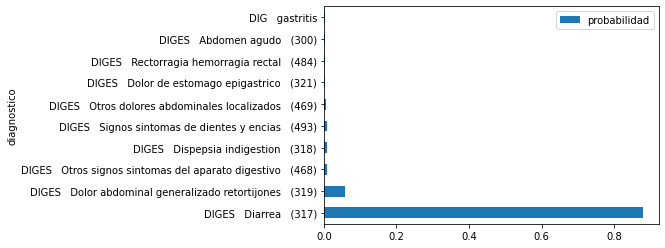

In [ ]:
array_invertido = np.argsort(tf_prediction)[::-1]
diagnosticos = le.inverse_transform(array_invertido)
probabilidad = np.sort (tf_prediction)[::-1]
list_of_tuples = list(zip(diagnosticos, probabilidad))[:10]
df = pd.DataFrame(list_of_tuples, columns = ['diagnostico', 'probabilidad']) 
df.head(10).plot.barh(x='diagnostico')

In [ ]:
#Guardar modelo en save model

In [ ]:
distil_save_path = path + 'distil/5/'
tf.saved_model.save(loaded_model, distil_save_path)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2342: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:1395: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: /content/drive/My Drive/Emergencias/Consultas/distil/5/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Emergencias/Consultas/distil/5/assets


In [ ]:
#Bien, el modelo se guardó sin warnigs

In [ ]:
new_model = tf.keras.models.load_model(distil_save_path, compile=True)

# Check its architecture
new_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  134734080 
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  73055     
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 135,397,727
Trainable params: 135,397,727
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  134734080 
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  73055     
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 135,397,727
Trainable params: 135,397,727
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_sentence = "Tos. Fiebre y dolor abdominal con muchos vómitos"
test_sentence_sarcasm = "News anchor hits back at viewer who sent her snarky note about ‘showing too much cleavage’ during broadcast"

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]
print(tf_output)

[[ -9.204406    -4.7185445   -5.1725287  -10.350285    -5.2964535
   -5.8102493   -6.871397    -8.007645    -5.7008142   -9.705943
  -13.035691    -8.894673    -9.381257   -11.20696     -3.6932333
   -5.318144    -6.4413915   -2.2746615   -0.02607657  -0.5589947
   -0.6716875   -0.8639523   -1.5805278   -5.721375    -1.0181592
   -1.5578027   -7.6253424   -5.078381    -3.7210345    2.174593
   -5.221403    -5.2446523   -5.327662    -8.270119    -5.3224897
   -7.440607    -7.647394    -7.0605407   -4.3327293   -2.7049246
   -1.1261857   -2.977607    -3.1371937   -5.1968117   -4.1283455
   -7.4191785    1.4139282   -3.1280818   -5.3376827   -0.11146447
   -8.485879    -4.8212      -5.6235504   -5.139789    -7.5577717
   -5.843779    -4.901557    -5.826025    -3.5727067   -5.664364
   -6.7173405   -8.720171    -7.7939467   -7.4672117   -5.057476
   -4.4025903   -7.1316094   -5.491218    -3.2160065   -3.548831
   -7.0706472   -6.5795574   -2.319498    -6.041038    -1.7574955
   -2.1015453 

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loaded_model.compile(optimizer=optimizer, loss=loaded_model.compute_loss, metrics=['accuracy'])

In [ ]:
loaded_model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  134734080 
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  73055     
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 135,397,727
Trainable params: 135,397,727
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
#new_model.compile(optimizer=optimizer, loss=new_model.compute_loss, metrics=['accuracy'])

NameError: ignored